特征选择

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.serif'] = ['simsun']
font1 = {'weight' : 'normal','size': 24}
plt.rcParams['axes.unicode_minus']=False
mpl.style.use('ggplot')

In [2]:
train_FD001_path = r'../data/processed_data/train_FD001.csv'
test_FD001_path = r'../data/processed_data/test_FD001.csv'

In [3]:
train_FD001 = pd.read_csv(train_FD001_path).iloc[:, 1:]
test_FD001 = pd.read_csv(test_FD001_path).iloc[:, 1:]

In [4]:
train_FD001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 25 columns):
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
s1          20631 non-null float64
s2          20631 non-null float64
s3          20631 non-null float64
s4          20631 non-null float64
s5          20631 non-null float64
s6          20631 non-null float64
s7          20631 non-null float64
s8          20631 non-null float64
s9          20631 non-null float64
s10         20631 non-null float64
s11         20631 non-null float64
s12         20631 non-null float64
s13         20631 non-null float64
s14         20631 non-null float64
s15         20631 non-null float64
s16         20631 non-null float64
s17         20631 non-null float64
s18         20631 non-null float64
s19         20631 non-null float64
s20         20631 non-null float64
s21         20631 non-null float64
RUL         20631 non-null int64
dtypes: float64(24

In [5]:
train_FD001.head()

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,130
1,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,...,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,130
2,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,...,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,130
3,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,...,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,130
4,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,...,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,130


In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression
#选择K个最好的特征，返回选择特征后的数据
select = SelectKBest(mutual_info_regression, k=20).fit(train_FD001.iloc[:, :-1], train_FD001.iloc[:, -1])

/Users/zhaofei/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [38]:
def draw_bar(labels,quants):
    width = 0.4
    ind = np.linspace(0.5,23.5,24)
    # make a square figure
    
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.gca()
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    fig = plt.figure(1)
    ax  = fig.add_subplot(111)
    # Bar Plot
    ax.bar(ind-width/2,quants,width,color='blue')
    # Set the ticks on x-axis
    ax.set_xticks(ind)
    ax.set_xticklabels(labels)
    # labels
    plt.tick_params(labelsize=15, color='black')
    ax.set_xlabel('特征', font1)
    ax.set_ylabel('互信息', font1)
    # title
    #ax.set_title('Mutual information between features and labels', bbox={'facecolor':'0.8', 'pad':5})
    plt.grid(linestyle='-.', c='black')
    plt.savefig("bar.jpg")
    plt.show()
    plt.close()

24个特征的互信息依次为： [0.0018853  0.00069066 0.00325928 0.         0.33044348 0.30506985
 0.45508245 0.00937285 0.0045723  0.41650212 0.25926572 0.22292636
 0.         0.49732174 0.42817458 0.26123841 0.21850786 0.38642749
 0.00236871 0.31651135 0.         0.00875875 0.36196737 0.37033348]
(24,)


/Users/zhaofei/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


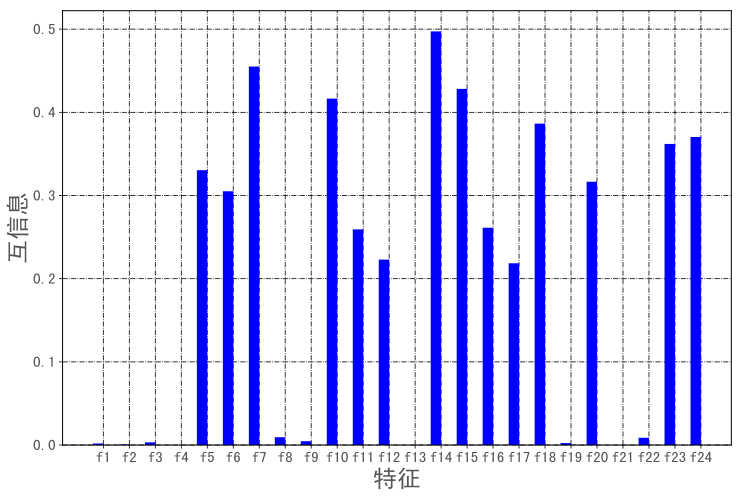

In [39]:
mutual_info = select.scores_
print("24个特征的互信息依次为：", mutual_info)
print(mutual_info.shape)
labels = ['f{}'.format(i) for i in range(1,25)]
draw_bar(labels, mutual_info)